# A. La régression lineaire

#I. Introduction
##II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...n \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... n\}$$

### Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

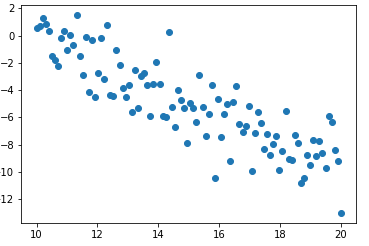

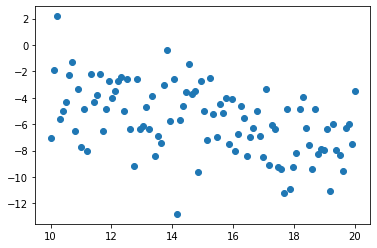

In [2]:
# Votre code ici
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10,20,100)
y = -0.5*x + ((np.random.randn(100) * 2.25) +2)

plt.scatter(x,y)
plt.show()

Q2. Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$

Que remarquez-vous?


fonction de cout_h1 =  0.04319802013484081
fonction de cout_h2 =  4.232844857479539
fonction de cout_h3 =  0.06445848105760445
-------------------------------
fonction de cout_h1 < fonction de cout_h3 < fonction de cout_h2


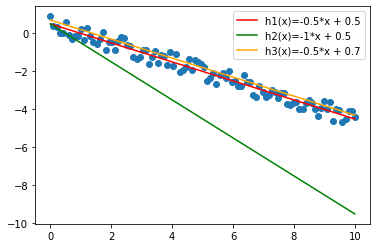

In [4]:
#Votre code ici
##########################################################################
x = np.linspace(0,10,100)
y = -0.5*x + np.random.random(100)

#h1(x)
w1_h1 = -0.5 ; w0_h1 = 0.5
h1 = w1_h1*x + w0_h1
#h2(x)
w1_h2 = -1 ; w0_h2 = 0.5
h2 = w1_h2*x + w0_h2
#h3(x)
w1_h3 = -0.5 ; w0_h3 = 0.7
h3 = w1_h3*x + w0_h3

###################################################
'''calculons la fonction de cout '''
def J(h):
    return (1/(2*100)) * ((h-y).dot(h-y))
###################################################

print('fonction de cout_h1 = ',J(h1))
print("fonction de cout_h2 = ",J(h2))
print("fonction de cout_h3 = ",J(h3))
print("-------------------------------")
print("fonction de cout_h1 < fonction de cout_h3 < fonction de cout_h2")

plt.scatter(x,y)

plt.plot(x , h1 , color="red",   label = "h1(x)=-0.5*x + 0.5")
plt.plot(x , h2 , color="green", label = "h2(x)=-1*x + 0.5")
plt.plot(x , h3 , color="orange",  label = "h3(x)=-0.5*x + 0.7")

plt.legend()
plt.show()

Q3. Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

Aprés 2000 itérations w0 = 0.7543353207185847 et w1 = -0.5365084223704679


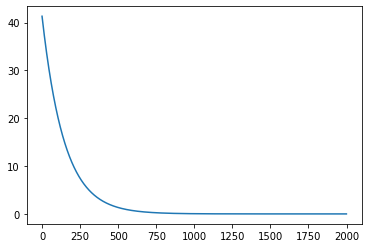

In [6]:
# votre code ici
import random
#Ecrire un script pour cet algorithme
learning_rate = 0.0001
nbr_iterations = 2000


def derivee_partielle(h):
    derivee_par_rapport_a_w0 = (1/100)*(sum(h-y))
    derivee_par_rapport_a_w1 = (1/100)*(sum((h-y)*x))
    return [derivee_par_rapport_a_w0 , derivee_par_rapport_a_w1]

def nouvelle_theta(ancien_w0 , ancien_w1):
    new_w0 = 0
    new_w1 = 0
    h = ancien_w1 * x + ancien_w0
    [d_w0 , d_w1] = derivee_partielle(h)
    new_w0 = ancien_w0 - (learning_rate * d_w0)
    new_w1 = ancien_w1 - (learning_rate * d_w1)
    return [new_w0 , new_w1]

    
def gradient_descent():
    w0 = random.randint(0,1)
    w1 = random.randint(0,1)
    xx = []
    yy = []
    for i in range(nbr_iterations):
        [new_w0 , new_w1] = nouvelle_theta(w0,w1)
        w0 = new_w0
        w1 = new_w1
        xx.append(i)
        yy.append(J(w1*x+w0))
    return [w0 , w1 , xx , yy]

[w0,w1,xx,yy] = gradient_descent()
'''Exemple d'execution d'algorithme'''
print ("Aprés {0} itérations w0 = {1} et w1 = {2}".format(nbr_iterations,w0,w1))
plt.plot(xx,yy)
plt.show()

Q4. Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

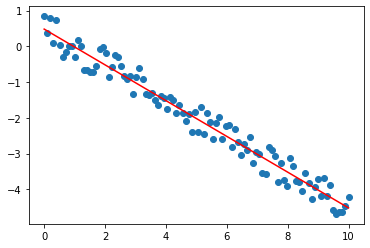

In [42]:
#Votre code ici
#a
w1 = ( (x-x.mean()).dot(y-y.mean()) ) / ( (x-x.mean()).dot(x-x.mean()) )
w0 = ( y.mean() )- ( w1*(x.mean()) )
#b
plt.scatter(x,y)
plt.plot(x,w1*x+w0 , color='red')

# III-Régression lineaire multiple
Dans ce cas $x=(x_{0}, x_{1},...,x_{n})\in \Re^{n}$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

### Refaire les mêmes étapes pour n=2

### nuage de points

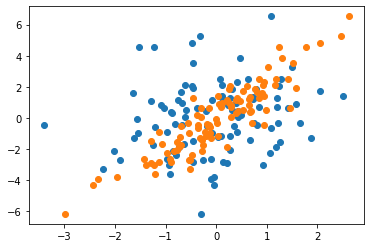

In [78]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.randn(100)
x2 = np.random.randn(100)
h_x_1 = 0.5*x1
h_x_2 = 2*x2
y  = (h_x_1)+ (h_x_2) + (np.random.randn(100) )

plt.scatter(x1,y)
plt.scatter(x2,y)
plt.show()

In [ ]:
'''
#Votre code ici
##########################################################################
x = np.linspace(0,10,100)
y = -0.5*x + np.random.random(100)

#h1(x)
w1_h1 = -0.5 ; w0_h1 = 0.5
h1 = w1_h1*x + w0_h1
#h2(x)
w1_h2 = -1 ; w0_h2 = 0.5
h2 = w1_h2*x + w0_h2
#h3(x)
w1_h3 = -0.5 ; w0_h3 = 0.7
h3 = w1_h3*x + w0_h3

###################################################
'''calculons la fonction de cout '''
def J(h):
    return (1/(2*100)) * ((h-y).dot(h-y))
###################################################

print('fonction de cout_h1 = ',J(h1))
print("fonction de cout_h2 = ",J(h2))
print("fonction de cout_h3 = ",J(h3))
print("-------------------------------")
print("fonction de cout_h1 < fonction de cout_h3 < fonction de cout_h2")

plt.scatter(x,y)

plt.plot(x , h1 , color="red",   label = "h1(x)=-0.5*x + 0.5")
plt.plot(x , h2 , color="green", label = "h2(x)=-1*x + 0.5")
plt.plot(x , h3 , color="orange",  label = "h3(x)=-0.5*x + 0.7")

plt.legend()
plt.show()
'''

In [ ]:
def predict(alfa , beta , xi):
    return alfa + beta*xi

def error(alfa , beta , xi , yi):
    return yi - predict(alfa , beta , xi)

def sum_of_squard_error( alfa , beta , x,y):
    return sum(error(alfa , beta , xi , yi)**2 for xi,yi in zip(x,y))

def least_squares_fit(x , y):
    beta = ( (x-x.mean()).dot(y-y.mean()) ) / ( (x-x.mean()).dot(x-x.mean()) )
    alfa = ( y.mean() )- ( beta*(x.mean()))
    return alfa,beta